#Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid
from sklearn.model_selection import train_test_split

#Data Preprocessing

In [4]:
ds = pd.read_csv('/content/train.csv')

In [6]:
ds.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X=ds.drop("label",axis=1)
y=ds["label"]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [9]:
X_train = X_train/255
X_test=X_test/255

In [10]:
print(X_train.shape)
print(y_train.shape)

(33600, 784)
(33600,)


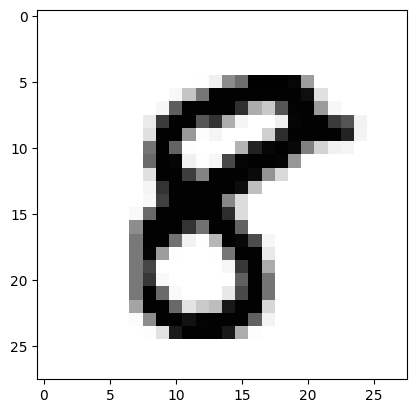

In [17]:
plt.imshow(X_train.iloc[0].values.reshape(28,28),cmap='Greys')

#Model Creation

In [12]:
model=tf.keras.models.Sequential([
    layers.Input(X_train.shape[1:]),
    layers.Flatten(),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
1050/1050 [==============================] - 3s 2ms/step - loss: 0.5718 - accuracy: 0.8548
Epoch 2/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3315 - accuracy: 0.9079
Epoch 3/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2985 - accuracy: 0.9155
Epoch 4/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2831 - accuracy: 0.9205
Epoch 5/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2718 - accuracy: 0.9240
Epoch 6/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2641 - accuracy: 0.9264
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2588 - accuracy: 0.9273
Epoch 8/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2541 - accuracy: 0.9290
Epoch 9/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2502 - accuracy: 0.9299
Epoch 10/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.247

#Model Evaluation

In [18]:
model.evaluate(X_train,y_train)

1050/1050 [==============================] - 3s 3ms/step - loss: 0.2209 - accuracy: 0.9381


[0.22090882062911987, 0.938095211982727]

In [19]:
model.evaluate(X_test,y_test)

263/263 [==============================] - 1s 2ms/step - loss: 0.2681 - accuracy: 0.9265


[0.2681168019771576, 0.926547646522522]

1/1 [==============================] - 0s 187ms/step
[5.4810134e-06 3.3885977e-11 4.7464201e-01 5.1990807e-01 1.5642843e-08
 6.2781605e-06 4.3864933e-11 2.3929708e-04 5.1878993e-03 1.0969561e-05] ==> 3


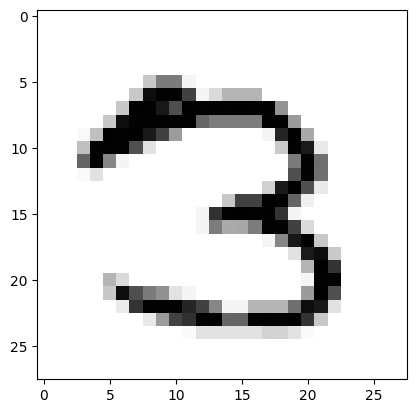

[2.4153998e-04 2.9326181e-08 3.5096670e-04 3.2484103e-03 1.0944210e-04
 9.7726405e-01 3.3629908e-06 6.7684859e-08 1.8142065e-02 6.4015156e-04] ==> 5


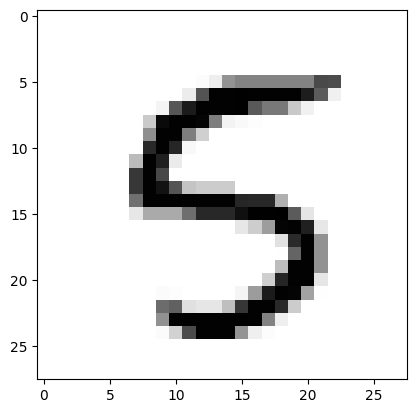

[4.1219369e-08 7.8012841e-10 3.1652221e-06 6.0360315e-05 2.6905106e-03
 2.7432531e-04 2.8889386e-11 2.9416331e-03 1.9115103e-02 9.7491485e-01] ==> 9


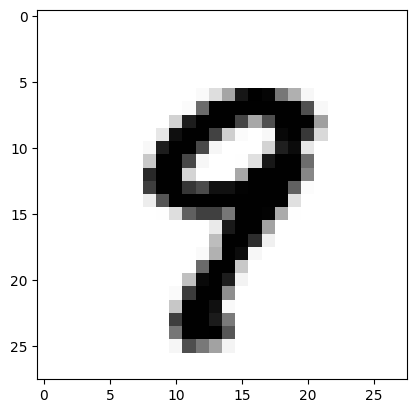

[4.2124402e-02 4.2549441e-08 1.4007767e-03 1.4798712e-03 2.4474211e-02
 7.5651500e-03 5.7643859e-07 2.5865769e-01 4.7281175e-03 6.5956920e-01] ==> 9


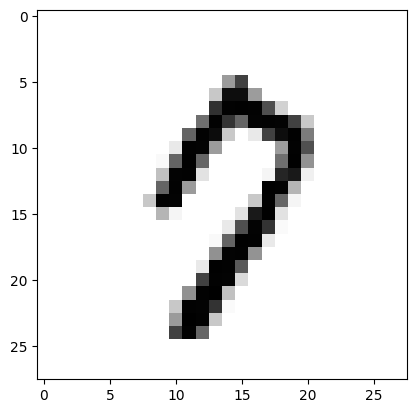

[5.8460301e-07 1.6893180e-05 6.3963607e-03 9.8296553e-01 1.3495920e-05
 3.9324560e-03 1.4141146e-09 1.0427258e-05 5.1369299e-03 1.5272448e-03] ==> 3


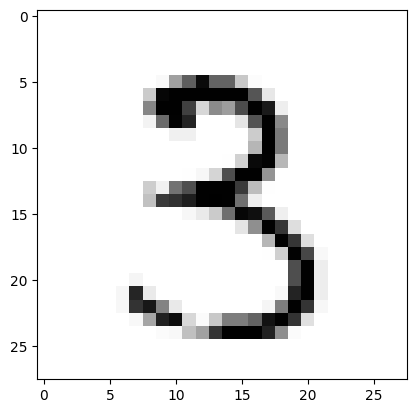

In [23]:
probs=model.predict(X_test.iloc[:5])
pred = np.argmax(probs,axis=1)
for i in range(5):
  print(probs[i],"==>",pred[i])
  plt.imshow(X_test.iloc[i].values.reshape(28,28),cmap='Greys')
  plt.show()